In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
alucar = pd.read_csv('C:\\Users\\gcarvalho\\Desktop\\Data Science Content\\01 - Conteúdos\\Códigos\\Bases de dado\\material curso - Time Series\\alucar.csv')

In [5]:
alucar.mes = pd.to_datetime(alucar.mes)
alucar['aumento'] = alucar.vendas.diff()
alucar['aceleracao'] = alucar.aumento.diff()
alucar['aumento'].fillna(method='bfill', inplace=True)
alucar['aceleracao'].fillna(alucar['aceleracao'].mean().round(), inplace=True)
alucar

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,10.0,2.0
1,2017-02-28,20,10.0,2.0
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


In [6]:
def plot(x, y, dados, title, xlabel, ylabel):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    graf = sns.lineplot(x=x, y=y, data=dados)
    graf.figure.set_size_inches(12, 6)
    graf.set_title(title, loc='left', fontsize=18)
    graf.set_xlabel(xlabel, fontsize=14)
    graf.set_ylabel(ylabel, fontsize=14)

def plot_comparison(x, y1, y2, y3, dados, title, xlabel, ylabel):
    sns.set_palette('magma')
    sns.set_style('darkgrid')
    graf = plt.subplot(3,1,1) 
    sns.lineplot(x=x, y=y1, data=dados)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dados)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dados)
    graf.set_title(title, loc='left', fontsize=18)
    graf.set_xlabel(xlabel, fontsize=14)
    graf.figure.set_size_inches(12, 6)


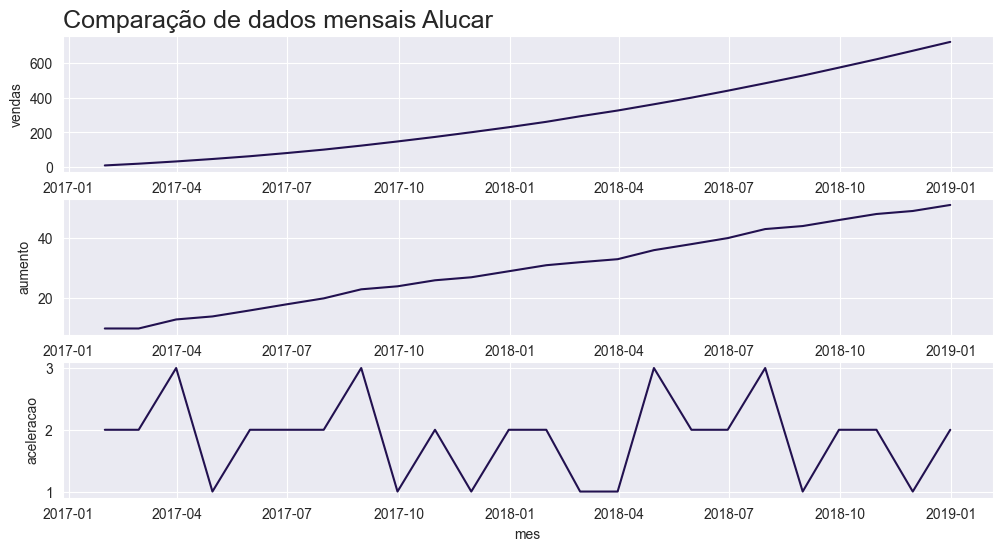

In [7]:
plot_comparison('mes','vendas','aumento','aceleracao',alucar,'Comparação de dados mensais Alucar','Tempo','Vendas')

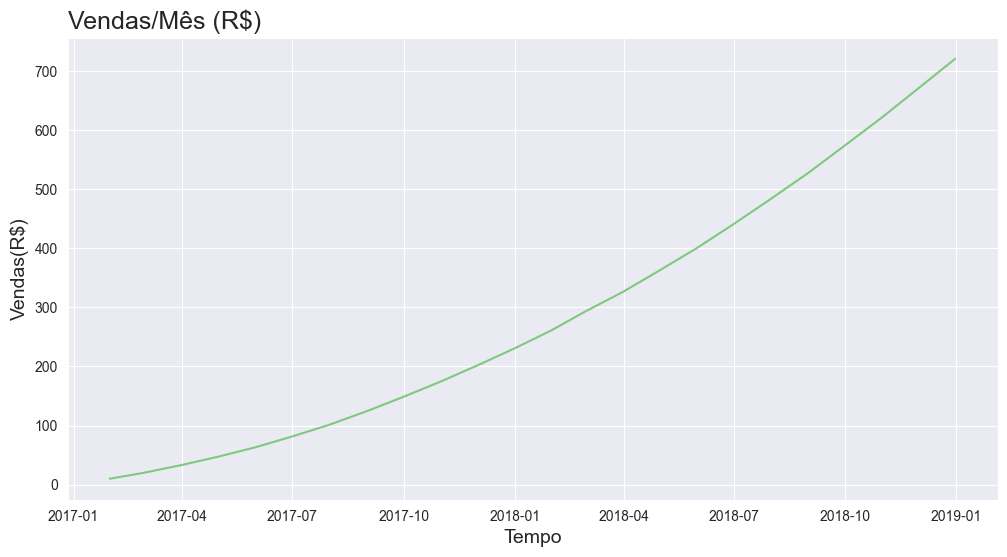

In [8]:
vendas = plot('mes','vendas',alucar,'Vendas/Mês (R$)','Tempo','Vendas(R$)')

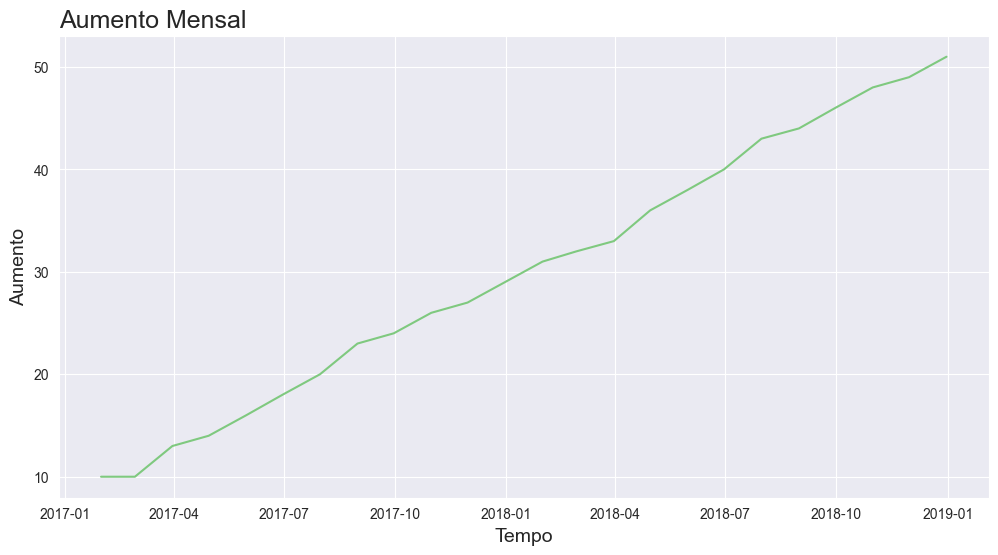

In [9]:
aumento = plot('mes','aumento',alucar,'Aumento Mensal','Tempo','Aumento')

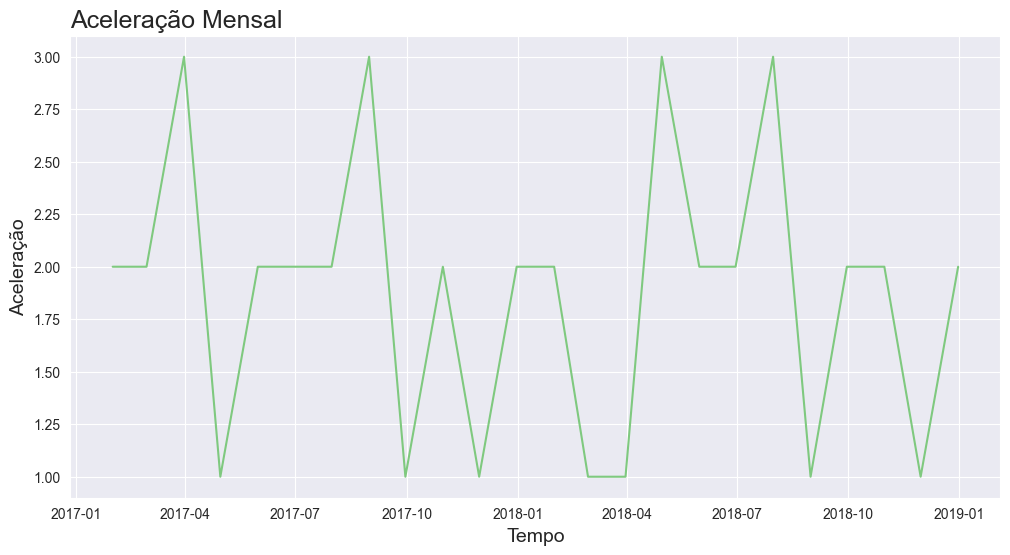

In [10]:
aceleracao = plot('mes','aceleracao',alucar,'Aceleração Mensal','Tempo','Aceleração')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

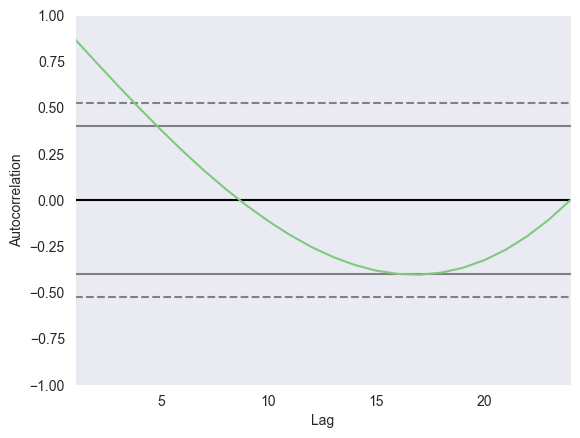

In [11]:
pd.plotting.autocorrelation_plot(alucar['vendas'])

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
result = seasonal_decompose(alucar['vendas'], period=1)

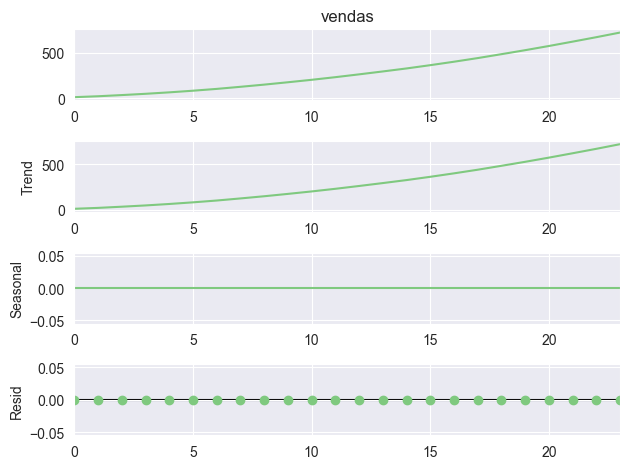

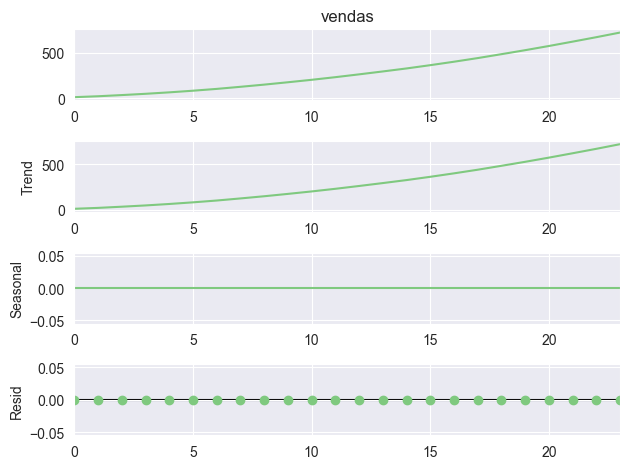

In [21]:
result.plot()

In [25]:
observacao = result.observed
tendencia = result.trend
season = result.seasonal
residuo = result.resid

dados = {
    'obsercacao':observacao,
    'tendencia':tendencia,
    'season':season,
    'residuo':residuo
}

In [28]:
xl = pd.DataFrame(dados)
xl

,obsercacao,tendencia,season,residuo
0,10.0,10.0,0.0,0.0
1,20.0,20.0,0.0,0.0
2,33.0,33.0,0.0,0.0
3,47.0,47.0,0.0,0.0
4,63.0,63.0,0.0,0.0
5,81.0,81.0,0.0,0.0
6,101.0,101.0,0.0,0.0
7,124.0,124.0,0.0,0.0
8,148.0,148.0,0.0,0.0
9,174.0,174.0,0.0,0.0


In [31]:
alucar['media_movel'] = alucar['vendas'].rolling(7).mean().round(2)

In [32]:
alucar

,mes,vendas,aumento,aceleracao,media_movel
0,2017-01-31,10,10.0,2.0,NaN
1,2017-02-28,20,10.0,2.0,NaN
2,2017-03-31,33,13.0,3.0,NaN
3,2017-04-30,47,14.0,1.0,NaN
4,2017-05-31,63,16.0,2.0,NaN
5,2017-06-30,81,18.0,2.0,NaN
6,2017-07-31,101,20.0,2.0,50.71
7,2017-08-31,124,23.0,3.0,67.00
8,2017-09-30,148,24.0,1.0,85.29
9,2017-10-31,174,26.0,2.0,105.43
